In [162]:
import pandas as pd
df=pd.read_excel('phoenix_data.xlsx',index_col=0)

In [163]:
print(df.columns)
df=df.drop(["compensation"],axis=1)
catcoll = ['Gender','hsc_stream','degree_domain', 'work_experience','specialization','status']
histcoll=['ssc_%', 'hsc_%','degree_%', 'mba_%']

Index(['Gender', 'ssc_%', 'ssc_board', 'hsc_%', 'hsc_board', 'hsc_stream',
       'degree_%', 'degree_domain', 'work_experience', 'entrance_score',
       'specialization', 'mba_%', 'status', 'compensation'],
      dtype='object')


In [164]:

for col in catcoll:
    unique_values =  df[col].unique()
    #print(unique_values)
    #for u in list(unique_values):
    #    print(u)
    df[[col]] = df[[col]].apply(lambda col:pd.Categorical(col).codes)
df.corr()['status'][:]


Gender             0.098525
ssc_%              0.603821
hsc_%              0.496813
hsc_stream         0.024592
degree_%           0.480088
degree_domain     -0.029909
work_experience    0.270758
entrance_score     0.135468
specialization    -0.249493
mba_%              0.088734
status             1.000000
Name: status, dtype: float64

In [165]:
#df.iloc[42:55,:]

In [166]:
!pip install seaborn

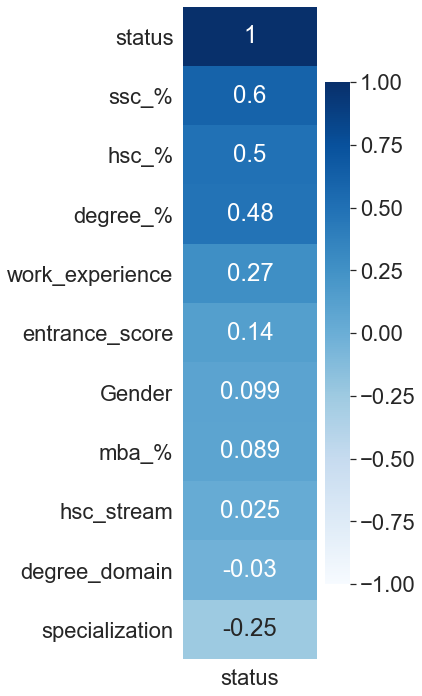

In [167]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(3,12))
sn.heatmap(df.corr()[['status']].sort_values(by=['status'],ascending=False),
            vmin=-1,
            cmap='Blues',
            annot=True,
          );
#res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
sn.set(font_scale=2)
plt.show()

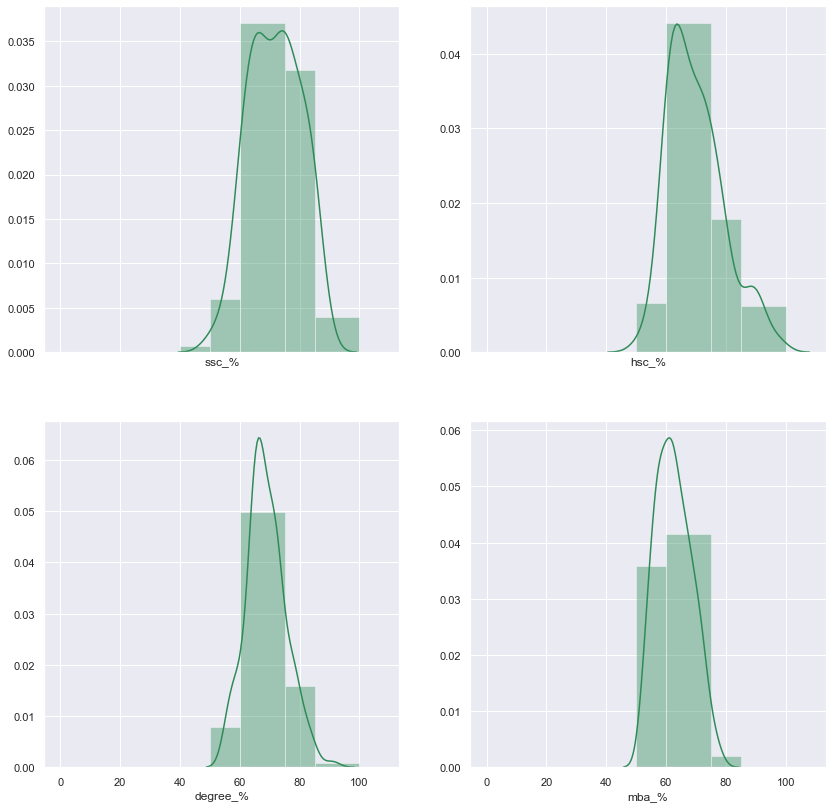

In [217]:
import matplotlib.pyplot as plt
df_placed=df[df['status']==1]
f, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True)

sn.set(font_scale=1)
axeses=[[0,0],[0,1],[1,0],[1,1]]
for col2,axs in zip(histcoll,axeses):
    sn.distplot( df_placed[col2] ,norm_hist=False, color = 'seagreen', label=str(col2), ax=axes[axs[0],axs[1]], bins=[0,30,40,50,60,75,85,100])
    
plt.show()
    
    



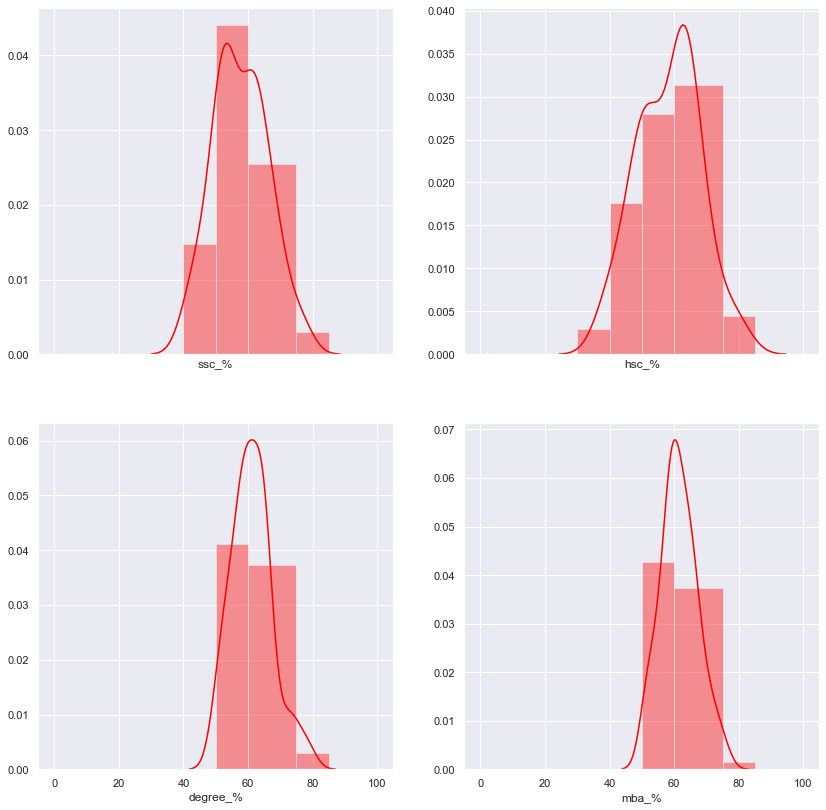

In [219]:
# df_unplaced=df[df['status']==0]

# sn.set(font_scale=2)
# for col2 in histcoll:
#     plt.figure(figsize=(12,12))
#     sn.distplot( df_unplaced[col2] , color = 'Skyblue',label=str(col2))
#     plt.legend()
#     plt.show()
    
df_unplaced=df[df['status']==0]
f, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True)

sn.set(font_scale=1)
axeses=[[0,0],[0,1],[1,0],[1,1]]
for col2,axs in zip(histcoll,axeses):
    sn.distplot( df_unplaced[col2] ,norm_hist=False, color = 'red', label=str(col2), ax=axes[axs[0],axs[1]], bins=[0,30,40,50,60,75,85,100])
    
plt.show()

In [223]:
df_placed.describe()

,Gender,ssc_%,hsc_%,hsc_stream,degree_%,degree_domain,work_experience,entrance_score,specialization,mba_%,status
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.0
mean,0.675497,71.768278,70.053841,1.384106,68.838411,0.589404,0.423841,73.365762,0.364238,62.687285,1.0
std,0.469747,8.745237,9.379247,0.575742,6.565254,0.896449,0.495810,13.648660,0.482817,5.938323,0.0
min,0.000000,49.000000,50.830000,0.000000,56.000000,0.000000,0.000000,50.000000,0.000000,52.380000,1.0
25%,0.000000,65.000000,63.000000,1.000000,65.000000,0.000000,0.000000,60.500000,0.000000,57.850000,1.0
50%,1.000000,73.000000,68.400000,1.000000,68.000000,0.000000,0.000000,72.000000,0.000000,62.280000,1.0
75%,1.000000,78.750000,75.500000,2.000000,72.615000,2.000000,1.000000,85.000000,1.000000,66.910000,1.0
max,1.000000,89.400000,97.700000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.0


In [221]:
df_unplaced.skew(axis = 0, skipna = True)

Gender            -0.304100
ssc_%              0.174021
hsc_%             -0.013314
hsc_stream        -0.393634
degree_%           0.558105
degree_domain      0.768051
work_experience    2.038333
entrance_score     0.568431
specialization    -0.561457
mba_%              0.277411
status             0.000000
dtype: float64